In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [4]:
portugal = gpd.read_file('shapes/gadm36_PRT_1.shp')
portugal = portugal.drop([1,12])

In [25]:
df = pd.read_csv("aves2018-bio4all.csv")
df = df[df.place_admin1_name != 'Madeira']
df = df[df.place_admin1_name != 'Azores']
df = df[df.place_admin1_name != 'Galicia']
count = (df.place_admin1_name.value_counts()).reset_index(name='count')
perc = (df.place_admin1_name.value_counts(normalize=True).mul(100).round(1)).reset_index(name='perc')
perc

,index,perc
0,Setúbal,20.7
1,Faro,16.1
2,Lisboa,13.3
3,Porto,11.8
4,Aveiro,8.7
5,Leiria,4.7
6,Santarém,4.3
7,Beja,3.1
8,Coimbra,2.5
9,Bragança,2.3


In [26]:
merged = portugal.merge(count, left_on='NAME_1', right_on='index')
merged = merged.merge(perc, left_on='NAME_1', right_on='index')
merged.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,index_x,count,index_y,perc
0,PRT,Portugal,PRT.1_1,Aveiro,None,None,Distrito,District,01,PT.AV,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40...",Aveiro,296,Aveiro,8.7
1,PRT,Portugal,PRT.3_1,Beja,None,None,Distrito,District,02,PT.BE,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37...",Beja,104,Beja,3.1
2,PRT,Portugal,PRT.4_1,Braga,None,None,Distrito,District,03,PT.BR,"POLYGON ((-8.22330 41.40873, -8.22311 41.40870...",Braga,45,Braga,1.3
3,PRT,Portugal,PRT.5_1,Bragança,Braganza,None,Distrito,District,04,PT.BA,"POLYGON ((-7.22189 41.13609, -7.22259 41.13617...",Bragança,79,Bragança,2.3
4,PRT,Portugal,PRT.6_1,Castelo Branco,None,None,Distrito,District,05,PT.CB,"POLYGON ((-8.16387 39.62655, -8.16429 39.62669...",Castelo Branco,63,Castelo Branco,1.9


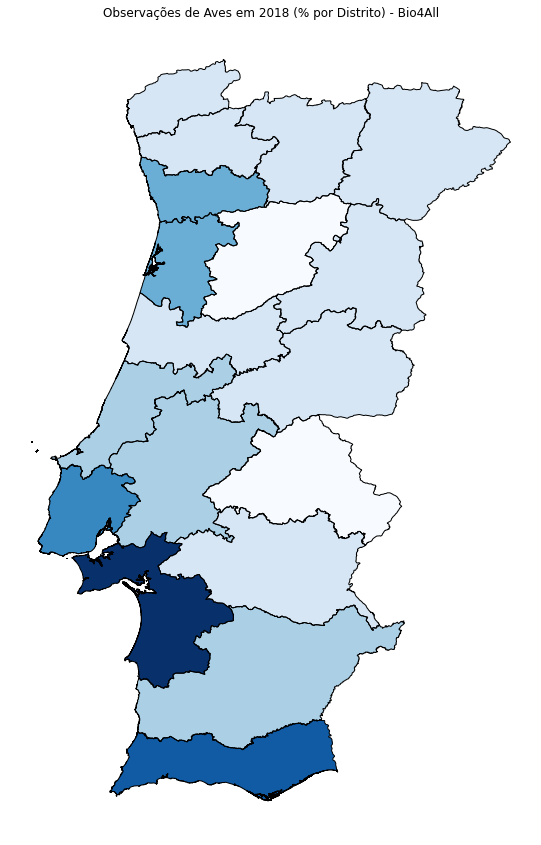

In [33]:
fig,ax = plt.subplots(figsize=(15,15))
ax.set_axis_off()
merged.boundary.plot(ax = ax, color = 'black',linewidth=1)
merged.plot(ax = ax,column='perc',cmap='Blues',scheme='user_defined', classification_kwds={'bins':[0,1,3,6,12,14,20]})
plt.title('Observações de Aves em 2018 (% por Distrito) - Bio4All')
plt.savefig('PercObsAves2018Bio4All.png', bbox_inches='tight')

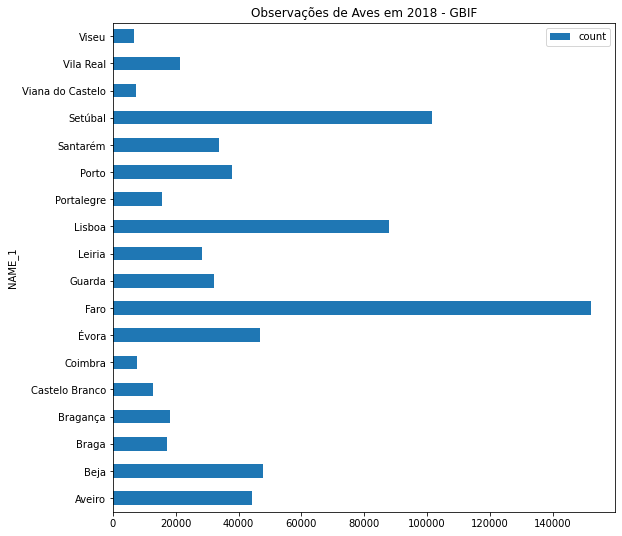

In [29]:
fig, ax = plt.subplots(figsize=(9,9))
pd.DataFrame(merged).plot.barh(ax=ax,x='NAME_1',y='count')
plt.title('Observações de Aves em 2018 - GBIF')
plt.savefig('HBarObsAves2018GBIF.png', bbox_inches='tight')